In [1]:
#Mouting drive for getting access to MyDrive
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
# Visualization Libraries
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

# Evaluation Metrics
#from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

In [3]:
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
from collections import defaultdict
from mpl_toolkits.mplot3d import Axes3D

In [5]:
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import PCA

In [6]:
crime = pd.read_pickle("drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime_Processed_Data.pkl")

In [7]:
crime.head()

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [8]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


In [9]:
crime.isnull().sum().sum()

5348

In [10]:
crime.apply(lambda x: sum(x.isnull()),axis=0)

IUCR                         0
Description                  0
Location Description         0
Arrest                       0
Domestic                     0
Beat                         0
District                     0
Ward                         0
Community Area               0
FBI Code                     0
Year                         0
Latitude                     0
Longitude                    0
Month                        0
Day_num                      0
Time                         0
day_of_week                  0
primary_type_grouped      2674
zone                         0
Count_CrimeType_Column    2674
dtype: int64

In [11]:
crime['primary_type_grouped'].unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'NARCOTIC_OFFENSE',
       'OTHER_OFFENSE', 'CRIMINAL_OFFENSE', 'WEAPONS_OFFENSE',
       'SEXUAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE', nan], dtype=object)

In [12]:
cime= crime.dropna(inplace=True)
crime = crime.reset_index(drop=True)

In [13]:
crime['primary_type_grouped'].unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'NARCOTIC_OFFENSE',
       'OTHER_OFFENSE', 'CRIMINAL_OFFENSE', 'WEAPONS_OFFENSE',
       'SEXUAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE'], dtype=object)

In [14]:
# Remove irrelevant/not meaningfull attributes
crime = crime.drop(['Count_CrimeType_Column'], axis=1)

In [15]:
crime.shape

(6624109, 19)

In [16]:
# Convert Categorical Attributes to Numerical
for col_name in crime.columns:
    if(crime[col_name].dtype == 'object'):
        crime[col_name]= crime[col_name].astype('category')
        crime[col_name] = crime[col_name].cat.codes

In [17]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6624109 entries, 0 to 6624108
Data columns (total 19 columns):
 #   Column                Dtype  
---  ------                -----  
 0   IUCR                  int16  
 1   Description           int16  
 2   Location Description  int16  
 3   Arrest                bool   
 4   Domestic              bool   
 5   Beat                  int64  
 6   District              float64
 7   Ward                  float64
 8   Community Area        float64
 9   FBI Code              int8   
 10  Year                  int64  
 11  Latitude              float64
 12  Longitude             float64
 13  Month                 int64  
 14  Day_num               int64  
 15  Time                  int64  
 16  day_of_week           int8   
 17  primary_type_grouped  int8   
 18  zone                  int8   
dtypes: bool(2), float64(5), int16(3), int64(5), int8(4)
memory usage: 581.2 MB


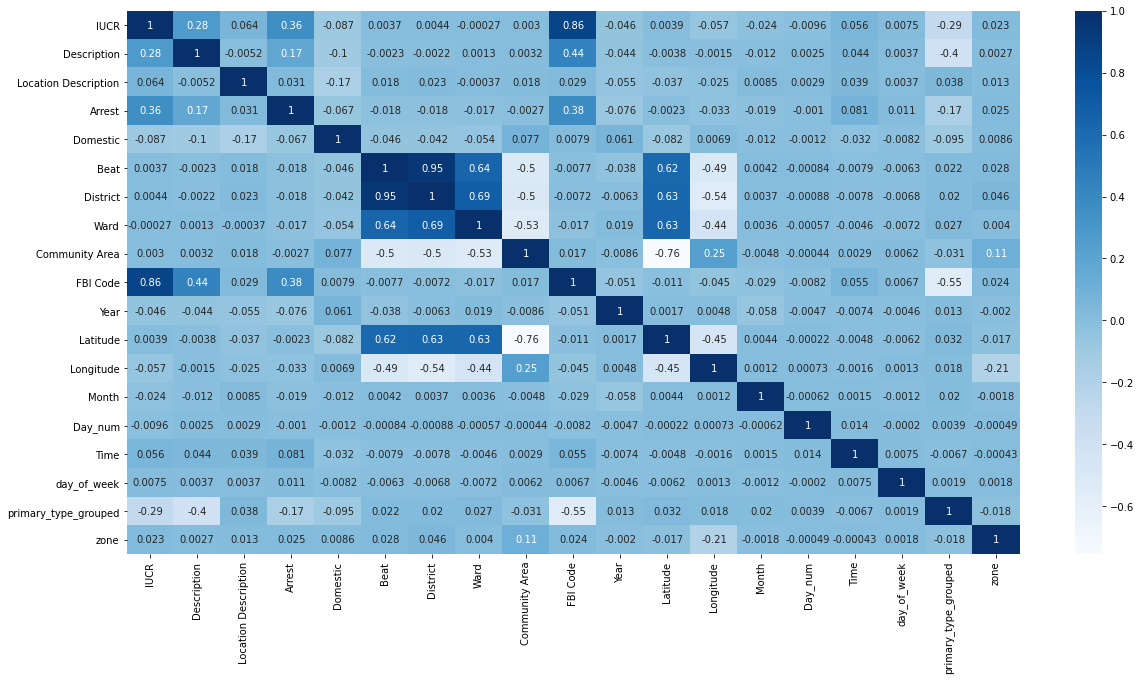

In [18]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = crime.drop(['primary_type_grouped'], axis=1)
Y_fs = crime['primary_type_grouped']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = crime.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [19]:
#Correlation with output variable
cor_target = abs(cor['primary_type_grouped'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.03]
relevant_features

IUCR                    0.292668
Description             0.398370
Location Description    0.038127
Arrest                  0.166601
Domestic                0.095439
Community Area          0.031119
FBI Code                0.548101
Latitude                0.031977
primary_type_grouped    1.000000
Name: primary_type_grouped, dtype: float64

In [20]:
#new = old.filter(['A','B','D'], axis=1)
final_df= crime.filter(['IUCR','Description','Location Description','Arrest','Domestic','Community Area','FBI Code','Latitude','primary_type_grouped'],axis=1)

In [21]:
final_df.head()

,IUCR,Description,Location Description,Arrest,Domestic,Community Area,FBI Code,Latitude,primary_type_grouped
0,52,194,158,False,True,61.0,10,41.815117,3
1,95,348,68,False,False,25.0,7,41.895080,6
2,273,364,181,True,False,21.0,20,41.937406,2
3,75,428,17,False,True,25.0,9,41.881903,3
4,81,220,158,False,False,71.0,6,41.744379,6


In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
scaled_features = final_df.drop(['primary_type_grouped'],axis=1)

In [24]:
scaler = StandardScaler()
scaler.fit(scaled_features)
scaled_features = scaler.transform(scaled_features)

In [25]:
scaled_features[0]

array([-0.84879011, -0.64112904,  0.31484544, -0.60604324,  2.51372764,
        1.08901206, -0.32147389, -0.29848883])

In [26]:
pca = PCA(3)
pca.fit(scaled_features)
  
pca_data = pd.DataFrame(pca.transform(scaled_features))
  
print(pca_data.head())

          0         1         2
0 -1.351269  1.341206 -1.332908
1 -0.815188 -0.915398 -0.514434
2  2.575150 -1.338800  0.430187
3 -0.873492 -0.412085 -3.117915
4 -1.199044  1.797257  0.796192


In [27]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.29267146 0.22152    0.1444066 ]


In [30]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=8,random_state=42)
k_means.fit(pca_data[[0,1]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

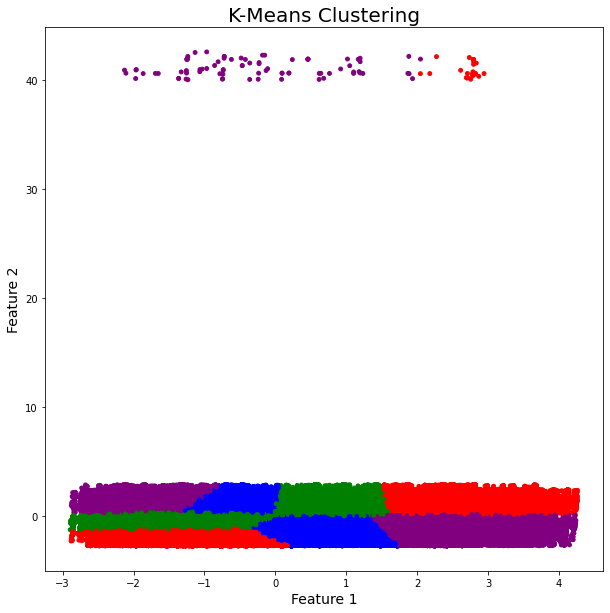

In [31]:
pca_data['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(pca_data[0],pca_data[1],c=pca_data['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [28]:
#kmeans clustering using 3 features
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=8,random_state=42)
k_means.fit(pca_data[[0,1,2]])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

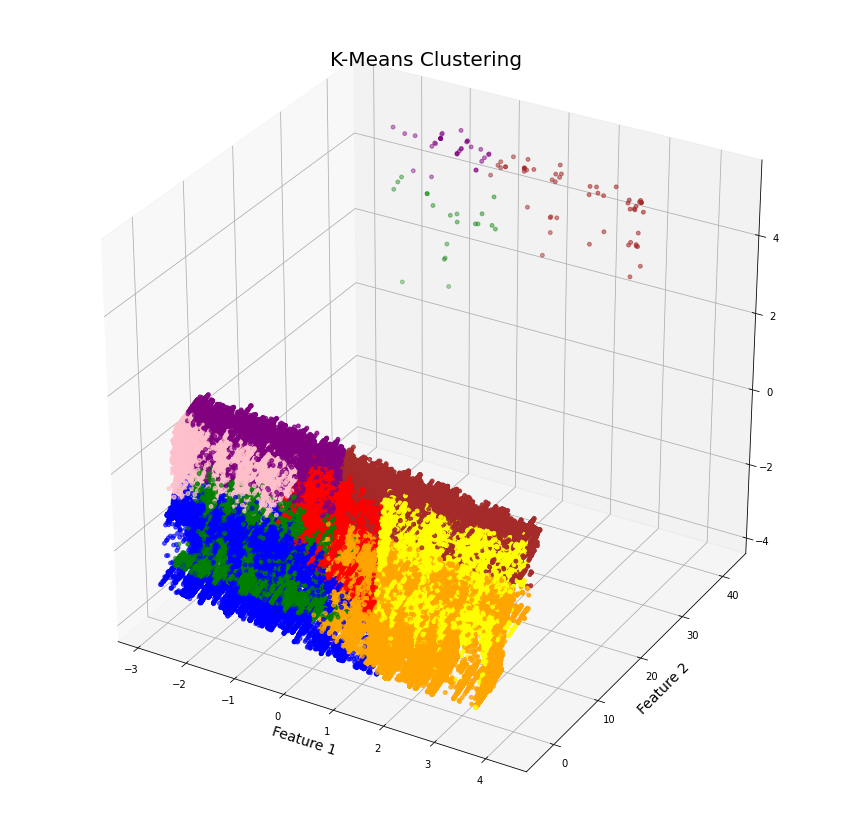

In [32]:
pca_data['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green','yellow','brown','pink','orange']

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111, projection = '3d')

#plt.figure(figsize=(10,10))
ax.scatter(pca_data[0],pca_data[1],pca_data[2],c=pca_data['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
#plt.zlabel('Feature 3',fontsize=14)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(pca_data[[0,1]])

In [ ]:
df['DBSCAN_labels']=dbscan.labels_ 

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()


ax = fig.add_subplot(111, projection = '3d')
ax.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
ax.xlabel('Feature 1',fontsize=14)
ax.ylabel('Feature 2',fontsize=14)
ax.zlabel('Feature 3',fontsize=14)


In [ ]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Random Forest Results ==========
Accuracy    :  0.4803400003925056
Recall      :  0.4803400003925056
Precision   :  0.4815983149957364
F1 Score    :  0.4803400003925056
Confusion Matrix: 
[[ 31134      6   7250  58381    837    289 147820     32]
 [   894     49    188   5581    108      7   3464      2]
 [  3474      4  61463  27050    232    623  39290     32]
 [  9886      5  21472 175839    958    523 119855     53]
 [  5579      4   6283  38727   2633    204  49256     31]
 [   574      9   1604   5517     54   6315   8326      6]
 [ 12080      0  15480  77994   1107    796 358775     72]
 [   355      0   2059   6717     85     40   7182    157]]


In [ ]:
# training metrics
print("Training metrics:")
print(classification_report(y_true=train_label_ids , y_pred= y_pred_train))

# testing metrics
print("Testing metrics:")
print(classification_report(y_true= test_label_ids, y_pred= y_pred_rf10))

In [ ]:
# Visualise classical Confusion M0atrix
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(test_label_ids, y_pred_rf10)
print(CM)

In [ ]:
# Visualize it as a heatmap
import seaborn as sn
sn.set(font_scale=1.4) # for label size
ax=sn.heatmap(CM,annot=True,annot_kws={"size": 16},fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Preprocessing
# Remove NaN Value (As Dataset is huge, the NaN row could be neglectable)  
df = df.dropna()

In [ ]:
# Remove irrelevant/not meaningfull attributes
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df = df.drop(['Location'], axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 18 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Date                  object 
 1   Block                 object 
 2   IUCR                  object 
 3   Primary Type          object 
 4   Description           object 
 5   Location Description  object 
 6   Arrest                bool   
 7   Domestic              bool   
 8   Beat                  int64  
 9   District              float64
 10  Ward                  float64
 11  Community Area        float64
 12  FBI Code              object 
 13  X Coordinate          float64
 14  Y Coordinate          float64
 15  Year                  int64  
 16  Latitude              float64
 17  Longitude             float64
dtypes: bool(2), float64(7), int64(2), object(7)
memory usage: 872.1+ MB


In [ ]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second

df['date'] = pd.to_datetime(df['Date'])
df['Year'] = df['date'].dt.year
df['Month'] = df['date'].dt.month
df['Day_num'] = df['date'].dt.day
df['Time'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.day_name()

In [ ]:
df = df.drop(['Date'], axis=1) 
df = df.drop(['date'], axis=1) 
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,9,5,13,Saturday
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,9,4,11,Friday
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,9,5,12,Saturday
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,9,5,13,Saturday
5,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,9,5,10,Saturday


In [ ]:
df.shape

(6626783, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 21 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int64  
 18  Day_num               int64  
 19  Time                  int64  
 20  day_of_week           object 
dtypes: bool(2), float64(7), int64(5), object(7)
memory usage: 1023.8+ MB


In [ ]:
n = len(pd.unique(df['Primary Type']))
print ("Unique Values of Primary Type: " , n)

Unique Values of Primary Type:  35


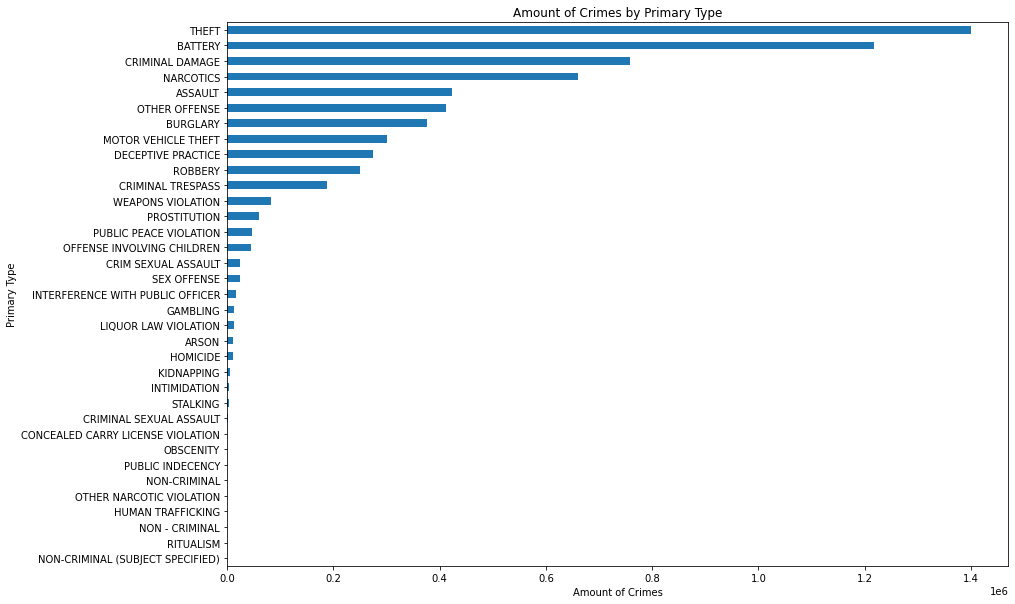

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
primary_type_map = {
    ('BURGLARY','MOTOR VEHICLE THEFT','THEFT','ROBBERY') : 'THEFT',
    ('BATTERY','ASSAULT','NON-CRIMINAL','NON-CRIMINAL (SUBJECT SPECIFIED)') : 'NON-CRIMINAL_ASSAULT',
    ('CRIM SEXUAL ASSAULT','SEX OFFENSE','STALKING','PROSTITUTION') : 'SEXUAL_OFFENSE',
    ('WEAPONS VIOLATION','CONCEALED CARRY LICENSE VIOLATION') :  'WEAPONS_OFFENSE',
    ('HOMICIDE','CRIMINAL DAMAGE','DECEPTIVE PRACTICE','CRIMINAL TRESPASS') : 'CRIMINAL_OFFENSE',
    ('KIDNAPPING','HUMAN TRAFFICKING','OFFENSE INVOLVING CHILDREN') : 'HUMAN_TRAFFICKING_OFFENSE',
    ('NARCOTICS','OTHER NARCOTIC VIOLATION') : 'NARCOTIC_OFFENSE',
    ('OTHER OFFENSE','ARSON','GAMBLING','PUBLIC PEACE VIOLATION','INTIMIDATION','INTERFERENCE WITH PUBLIC OFFICER','LIQUOR LAW VIOLATION','OBSCENITY','PUBLIC INDECENCY') : 'OTHER_OFFENSE'
}
primary_type_mapping = {}
for keys, values in primary_type_map.items():
    for key in keys:
        primary_type_mapping[key] = values
df['primary_type_grouped'] = df['Primary Type'].map(primary_type_mapping)

In [ ]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
df['zone'] = df.Block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int64  
 18  Day_num               int64  
 19  Time                  int64  
 20  day_of_week           object 
 21  primary_type_grouped  object 
 22  zone                  object 
dtypes: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Block                 object 
 1   IUCR                  object 
 2   Primary Type          object 
 3   Description           object 
 4   Location Description  object 
 5   Arrest                bool   
 6   Domestic              bool   
 7   Beat                  int64  
 8   District              float64
 9   Ward                  float64
 10  Community Area        float64
 11  FBI Code              object 
 12  X Coordinate          float64
 13  Y Coordinate          float64
 14  Year                  int64  
 15  Latitude              float64
 16  Longitude             float64
 17  Month                 int64  
 18  Day_num               int64  
 19  Time                  int64  
 20  day_of_week           object 
 21  primary_type_grouped  object 
 22  zone                  object 
dtypes: bool

In [ ]:
df['Count_CrimeType_Column'] = df['primary_type_grouped'].map(df['primary_type_grouped'].value_counts())

In [ ]:
df.head(5)

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,1165074.0,1875917.0,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,1138875.0,1904869.0,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,035XX W BARRY AVE,2023,NARCOTICS,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,1152037.0,1920384.0,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0000X N LARAMIE AVE,0560,ASSAULT,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,1141706.0,1900086.0,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,082XX S LOOMIS BLVD,0610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,1168430.0,1850165.0,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0


In [ ]:
df['primary_type_grouped'].unique()

array(['NON-CRIMINAL_ASSAULT', 'THEFT', 'NARCOTIC_OFFENSE',
       'OTHER_OFFENSE', 'CRIMINAL_OFFENSE', 'WEAPONS_OFFENSE',
       'SEXUAL_OFFENSE', 'HUMAN_TRAFFICKING_OFFENSE', nan], dtype=object)

In [ ]:
df.drop('Primary Type', inplace=True, axis=1)
df.drop('Block', inplace=True, axis=1)
df.drop('X Coordinate', inplace=True, axis=1)
df.drop('Y Coordinate', inplace=True, axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


In [ ]:
all_crime_type = df[['primary_type_grouped','Count_CrimeType_Column']].copy()

In [ ]:
all_crime_type.head()

,primary_type_grouped,Count_CrimeType_Column
0,NON-CRIMINAL_ASSAULT,1640154.0
1,THEFT,2327482.0
3,NARCOTIC_OFFENSE,661033.0
4,NON-CRIMINAL_ASSAULT,1640154.0
5,THEFT,2327482.0


In [ ]:
all_crime_type.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 2 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   primary_type_grouped    object 
 1   Count_CrimeType_Column  float64
dtypes: float64(1), object(1)
memory usage: 151.7+ MB


In [ ]:
all_crime_type.shape

(6626783, 2)

In [ ]:
all_crime_type.sort_values(['Count_CrimeType_Column'],ascending=[False])

,primary_type_grouped,Count_CrimeType_Column
2186108,THEFT,2327482.0
2243514,THEFT,2327482.0
2243498,THEFT,2327482.0
4290986,THEFT,2327482.0
2243500,THEFT,2327482.0
...,...,...
7310671,NaN,NaN
7310759,NaN,NaN
7310762,NaN,NaN
7310840,NaN,NaN


In [ ]:
# dropping ALL duplicte values
final_crime_type_counts= all_crime_type.drop_duplicates()

In [ ]:
final_crime_type_counts.shape

(9, 2)

In [ ]:
final_crime_type_counts= final_crime_type_counts.sort_values(['Count_CrimeType_Column'],ascending=[False])

In [ ]:
final_crime_type_counts = final_crime_type_counts.dropna()

In [ ]:
final_crime_type_counts.reset_index(drop=True, inplace =True)

In [ ]:
final_crime_type_counts

,primary_type_grouped,Count_CrimeType_Column
0,THEFT,2327482.0
1,NON-CRIMINAL_ASSAULT,1640154.0
2,CRIMINAL_OFFENSE,1230761.0
3,NARCOTIC_OFFENSE,661033.0
4,OTHER_OFFENSE,517088.0
5,SEXUAL_OFFENSE,112895.0
6,WEAPONS_OFFENSE,83250.0
7,HUMAN_TRAFFICKING_OFFENSE,51446.0


In [ ]:
df.dropna(how='all')

,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Year,Latitude,Longitude,Month,Day_num,Time,day_of_week,primary_type_grouped,zone,Count_CrimeType_Column
0,0486,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,924,9.0,12.0,61.0,08B,2015,41.815117,-87.670000,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,South,1640154.0
1,0870,POCKET-PICKING,CTA BUS,False,False,1511,15.0,29.0,25.0,06,2015,41.895080,-87.765400,9,4,11,Friday,THEFT,North,2327482.0
3,2023,POSS: HEROIN(BRN/TAN),SIDEWALK,True,False,1412,14.0,35.0,21.0,18,2015,41.937406,-87.716650,9,5,12,Saturday,NARCOTIC_OFFENSE,West,661033.0
4,0560,SIMPLE,APARTMENT,False,True,1522,15.0,28.0,25.0,08A,2015,41.881903,-87.755121,9,5,13,Saturday,NON-CRIMINAL_ASSAULT,North,1640154.0
5,0610,FORCIBLE ENTRY,RESIDENCE,False,False,614,6.0,21.0,71.0,05,2015,41.744379,-87.658431,9,5,10,Saturday,THEFT,South,2327482.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7311025,1130,FRAUD OR CONFIDENCE GAME,RESIDENCE,False,False,431,4.0,7.0,51.0,11,2021,41.710890,-87.568176,3,1,0,Monday,CRIMINAL_OFFENSE,South,1230761.0
7311026,1582,CHILD PORNOGRAPHY,RESIDENCE,False,False,1814,18.0,43.0,7.0,17,2021,41.924251,-87.638070,1,2,9,Saturday,HUMAN_TRAFFICKING_OFFENSE,North,51446.0
7311027,1750,CHILD ABUSE,APARTMENT,False,True,2535,25.0,37.0,23.0,08B,2021,41.902680,-87.725422,4,14,0,Wednesday,HUMAN_TRAFFICKING_OFFENSE,West,51446.0
7311028,0530,AGGRAVATED - OTHER DANGEROUS WEAPON,APARTMENT,True,False,1824,18.0,2.0,8.0,04A,2021,41.903497,-87.629975,4,14,19,Wednesday,NON-CRIMINAL_ASSAULT,North,1640154.0


In [ ]:
df.shape

(6626783, 20)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 20 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day_num                 int64  
 15  Time                    int64  
 16  day_of_week             object 
 17  primary_type_grouped    object 
 18  zone                    object 
 19  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(5), object(7)
memory usage: 973.2+ MB


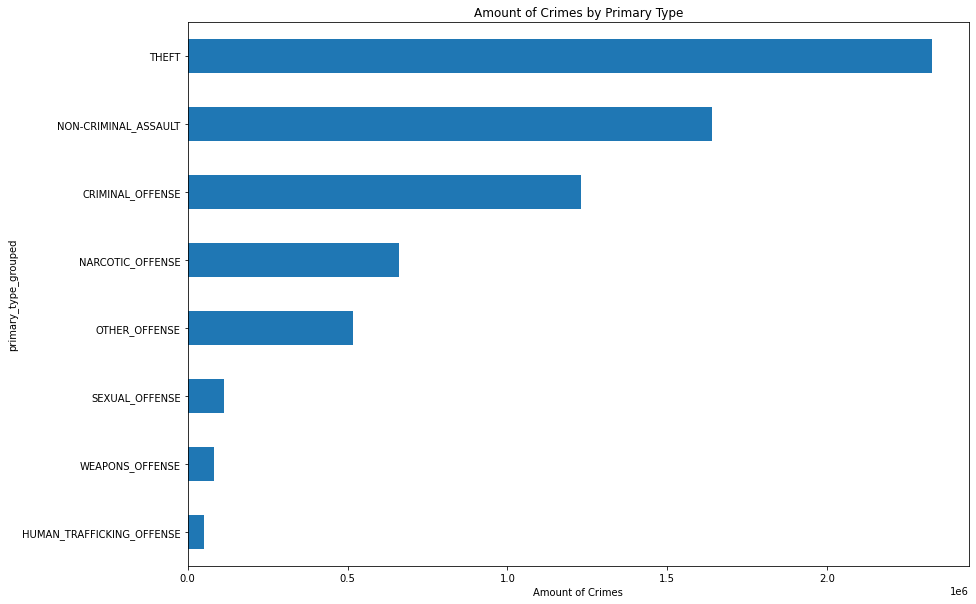

In [ ]:
# Plot Bar Chart visualize Primary Types
plt.figure(figsize=(14,10))
plt.title('Amount of Crimes by Primary Type')
plt.ylabel('Crime Type')
plt.xlabel('Amount of Crimes')

df.groupby([df['primary_type_grouped']]).size().sort_values(ascending=True).plot(kind='barh')
plt.show()

In [ ]:
n = len(pd.unique(df['Description']))
print ("Unique Values of Description: " , n)

Unique Values of Description:  533


In [ ]:
n = len(pd.unique(df['Year']))
print ("Unique Values of Year: " , n)

Unique Values of Year:  21


In [ ]:
n = len(pd.unique(df['District']))
print ("Unique Values of District: " , n)

Unique Values of District:  24


In [ ]:
n = len(pd.unique(df['Ward']))
print ("Unique Values of Ward: " , n)

Unique Values of Ward:  50


In [ ]:
n = len(pd.unique(df['Beat']))
print ("Unique Values of Beat: " , n)

Unique Values of Beat:  303


In [ ]:
n = len(pd.unique(df['Community Area']))
print ("Unique Values of Community Area: " , n)

Unique Values of Community Area:  78


In [ ]:
n = len(pd.unique(df['Location Description']))
print ("Unique Values of Location Description: " , n)

Unique Values of Location Description:  214


In [ ]:
n = len(pd.unique(df['Arrest']))
print ("Unique Values of Arrest: " , n)

Unique Values of Arrest:  2


In [ ]:
n = len(pd.unique(df['Domestic']))
print ("Unique Values of Domestic: " , n)

Unique Values of Domestic:  2


In [ ]:
n = len(pd.unique(df['Latitude']))
print ("Unique Values of Latitude: " , n)

Unique Values of Latitude:  658272


In [ ]:
n = len(pd.unique(df['Longitude']))
print ("Unique Values of Longitude: " , n)

Unique Values of Longitude:  657903


In [ ]:
n = len(pd.unique(df['Time']))
print ("Unique Values of Time: " , n)

Unique Values of Time:  24


In [ ]:
n = len(pd.unique(df['IUCR']))
print ("Unique Values of IUCR: " , n)

Unique Values of IUCR:  400


In [ ]:
n = len(pd.unique(df['FBI Code']))
print ("Unique Values of FBI Code: " , n)

Unique Values of FBI Code:  26


In [ ]:
import os
print(os.listdir(r"drive/My Drive/Colab Notebooks/CMPE_255_Project"))

['Chicago_Crime']


In [ ]:
# storing pandas dataframe as a picklefile for later use ...(Merged dataset for three files review, user, business)
os.path.isfile("drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime_Processed_Data.pkl")
df.to_pickle("drive/My Drive/Colab Notebooks/CMPE_255_Project/Chicago_Crime_Processed_Data.pkl")


In [ ]:
# Convert Categorical Attributes to Numerical
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes

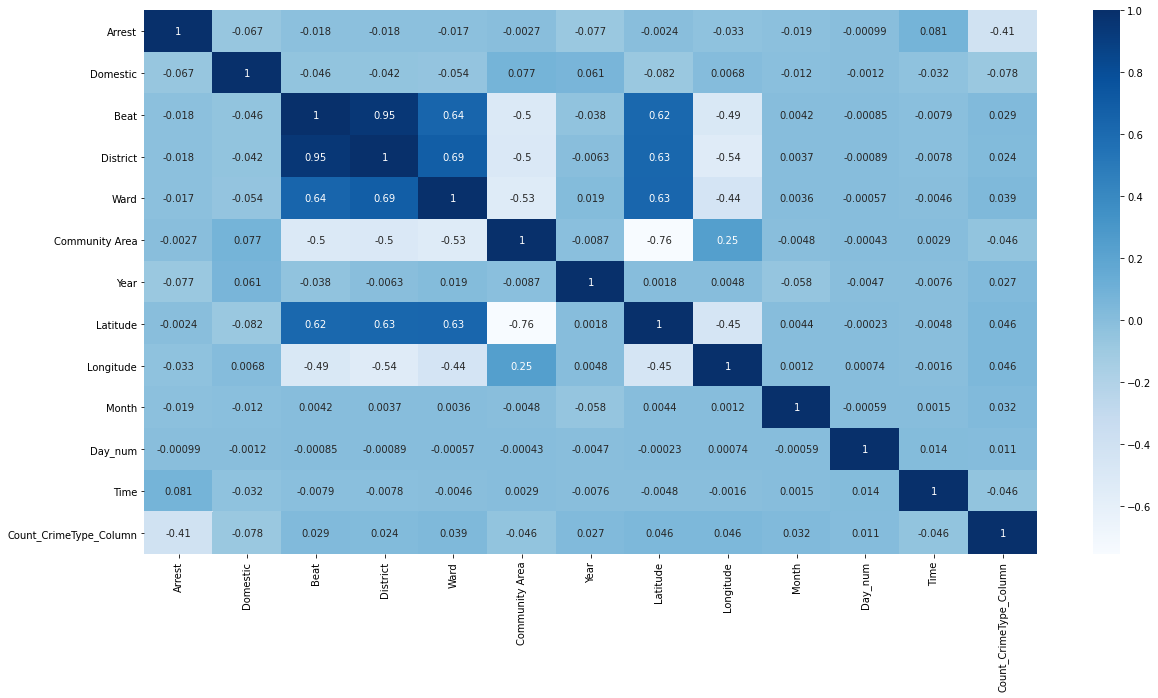

In [ ]:
# Feature Selection using Filter Method 
# Split Dataframe to target class and features
X_fs = df.drop(['primary_type_grouped'], axis=1)
Y_fs = df['primary_type_grouped']

#Using Pearson Correlation
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6626783 entries, 0 to 7311029
Data columns (total 21 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   IUCR                    object 
 1   Description             object 
 2   Location Description    object 
 3   Arrest                  bool   
 4   Domestic                bool   
 5   Beat                    int64  
 6   District                float64
 7   Ward                    float64
 8   Community Area          float64
 9   FBI Code                object 
 10  Year                    int64  
 11  Latitude                float64
 12  Longitude               float64
 13  Month                   int64  
 14  Day                     int64  
 15  Hour                    int64  
 16  Minute                  int64  
 17  Second                  int64  
 18  primary_type_grouped    object 
 19  zone                    object 
 20  Count_CrimeType_Column  float64
dtypes: bool(2), float64(6), int64(7

In [ ]:
# Convert Categorical Attributes to Numerical
for col_name in df.columns:
  if col_name != 'Primary Type':
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes